# Importing Useful Libraries

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
%matplotlib inline
import datetime
#imported all required libraries

# Reading the given Data

In [42]:
train=pd.read_csv("train3.csv") #reading given data for training the model 

In [43]:
test=pd.read_csv("test3.csv")  #reading given data for testing the model

In [44]:
train.head()# displaying top 5 rows to see the given dataset

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


# Data Exploration


In [45]:
train.shape #to find the rows and columns 

(94992, 3)

In [46]:
train.info() #to find out the datatypes and null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [47]:
train.dropna(inplace=True)
train.isnull().sum()# drop the data hvaing null values and then check for more null values 

row_id      0
datetime    0
energy      0
dtype: int64

In [48]:
train["date"]=pd.to_datetime(train["datetime"]).dt.date#spliting datetime into Day, month, year & hour,minutes, seconds
train["hours"]=pd.to_datetime(train["datetime"]).dt.hour
train["minutes"]=pd.to_datetime(train["datetime"]).dt.minute
train["seconds"]=pd.to_datetime(train["datetime"]).dt.second



In [49]:
train["day"]=pd.to_datetime(train["date"]).dt.day_name()
train["month"]=pd.to_datetime(train["date"]).dt.month_name()
train["year"]=pd.to_datetime(train["date"]).dt.year
train["week"]=pd.to_datetime(train["date"]).dt.week


C:\Users\This pc\AppData\Local\Temp\ipykernel_15284\2382734065.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train["week"]=pd.to_datetime(train["date"]).dt.week


In [50]:
train.head()

,row_id,datetime,energy,date,hours,minutes,seconds,day,month,year,week
0,1,2008-03-01 00:00:00,1259.985563,2008-03-01,0,0,0,Saturday,March,2008,9
1,2,2008-03-01 01:00:00,1095.541500,2008-03-01,1,0,0,Saturday,March,2008,9
2,3,2008-03-01 02:00:00,1056.247500,2008-03-01,2,0,0,Saturday,March,2008,9
3,4,2008-03-01 03:00:00,1034.742000,2008-03-01,3,0,0,Saturday,March,2008,9
4,5,2008-03-01 04:00:00,1026.334500,2008-03-01,4,0,0,Saturday,March,2008,9


<AxesSubplot:xlabel='energy', ylabel='year'>

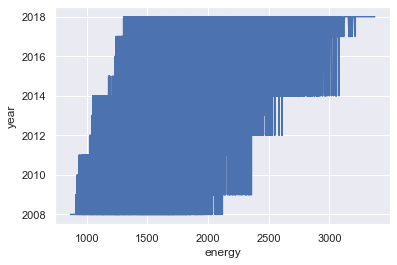

In [51]:

sns.lineplot(x=train["energy"], y=train["year"], data=train)

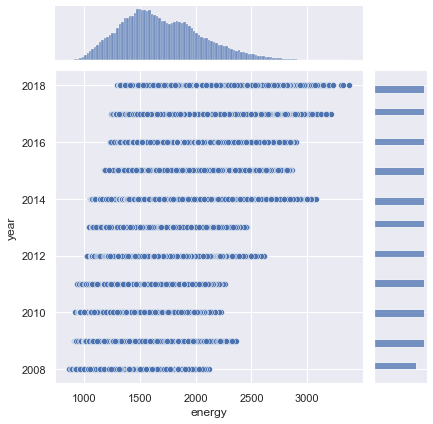

In [52]:
sns.jointplot(x=train["energy"], y=train["year"], data=train) # to see the distribution of independent variable vs dependent variables. 

In [53]:
train.year.unique()# to see how many years of data is available

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int64)

<AxesSubplot:xlabel='hours', ylabel='energy'>

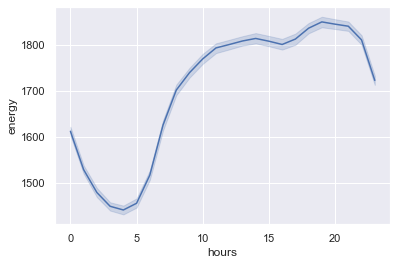

In [54]:
sns.lineplot(x=train["hours"], y=train["energy"], data=train)
#t osee energy usage on hourly bases  

# Model Training  

In [55]:
model=LinearRegression() #Training the model 

In [56]:
train.columns

Index(['row_id', 'datetime', 'energy', 'date', 'hours', 'minutes', 'seconds',
       'day', 'month', 'year', 'week'],
      dtype='object')

In [57]:
X=train[['row_id', 'hours', 'minutes', 'seconds', 'year', 'week']]
y=train["energy"]

In [58]:
model.fit(X,y)

LinearRegression()

In [70]:
test.head()# change test data to fit into the model built by training data  
test["Hours"]=pd.to_datetime(test["datetime"]).dt.hour
test["Minutes"]=pd.to_datetime(test["datetime"]).dt.minute
test["Seconds"]=pd.to_datetime(test["datetime"]).dt.second
test["year"]=pd.to_datetime(test["datetime"]).dt.year
test["week"]=pd.to_datetime(test["datetime"]).dt.week
ypred=model.predict(test[['row_id', 'Hours', 'Minutes', 'Seconds', 'year', 'week']])

C:\Users\This pc\AppData\Local\Temp\ipykernel_15284\3163542237.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test["week"]=pd.to_datetime(test["datetime"]).dt.week
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Hours
- Minutes
- Seconds
Feature names seen at fit time, yet now missing:
- hours
- minutes
- seconds

  warnings.warn(message, FutureWarning)


In [71]:
test.columns #column Headers 

Index(['row_id', 'datetime', 'Hours', 'Minutes', 'Seconds', 'year', 'week',
       'Energy'],
      dtype='object')

# Predicting Model and storing values to test.Energy

In [84]:
test["energy"]=ypred.round(3)
test.head()#to store the predicted values into energy column in test data

,row_id,datetime,Hours,Minutes,Seconds,year,week,Energy,energy
0,94993,2019-01-01 00:00:00,0,0,0,2019,1,1879.104994,1879.105
1,94994,2019-01-01 01:00:00,1,0,0,2019,1,1896.187514,1896.188
2,94995,2019-01-01 02:00:00,2,0,0,2019,1,1913.270034,1913.270
3,94996,2019-01-01 03:00:00,3,0,0,2019,1,1930.352553,1930.353
4,94997,2019-01-01 04:00:00,4,0,0,2019,1,1947.435073,1947.435


# RMSE

In [85]:
#RMSE Evaluation method
mse=mean_squared_error(y[1:26305],ypred)
RMSE=np.sqrt(mse)
print("RMSE evaluation metrics result is",RMSE)

RMSE evaluation metrics result is 816.841383191845


<AxesSubplot:xlabel='year', ylabel='energy'>

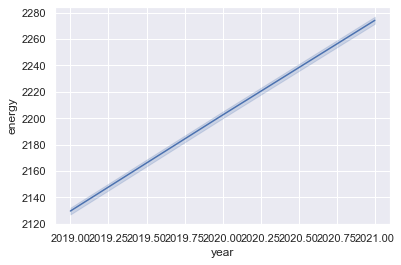

In [86]:
sns.lineplot(x=test["year"], y=test["energy"], data=test)

<AxesSubplot:xlabel='Hours', ylabel='energy'>

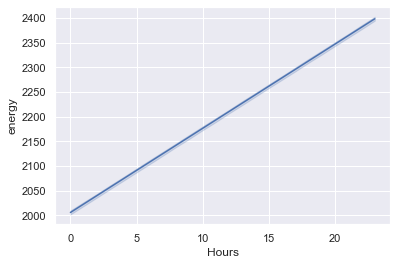

In [87]:

sns.lineplot(x=test["Hours"], y=test["energy"], data=test)


# Creating a New file sample_submission.csv and save data to it

In [88]:
sample_submission = test[["row_id", "energy"]] #saving output to Sample_Submission file 
sample_submission.head(2)

,row_id,energy
0,94993,1879.105
1,94994,1896.188


In [89]:
df=sample_submission.to_csv('sample_submission.csv', header=True, index=False)

In [90]:
1800/2400

0.75